# 2022 Fall EE5183 FinTech - Homework 2
## Deep Learning Model: Recurrent Neural Network, BERT

In [1]:
%pip install --force-reinstall numpy==1.18.5
%pip install pandas
%pip install TA-Lib
%pip install mplfinance

  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\tadeo\anaconda3\python.exe' 'c:\Users\tadeo\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\tadeo\AppData\Local\Temp\tmpmvvhjf0c'
         cwd: C:\Users\tadeo\AppData\Local\Temp\pip-install-bmnacc53\numpy_709ea85854a74528a071585f1ff2ac9b
    Complete output (267 lines):
    Running from numpy source directory.
    <string>:461: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
    Cythonizing sources
    Processing numpy/random\_bounded_integers.pxd.in
    Processing numpy/random\mtrand.pyx
    C:\Users\tadeo\AppData\Local\Temp\pip-install-bmnacc53\numpy_709ea85854a74528a071585f1ff2ac9b\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
      required_version = LooseVersion('0.29.14')
    C:\Users\tadeo\AppData\Local\Te

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


c:\Users\tadeo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import talib
import matplotlib as plt
import mplfinance as mpf

In [3]:
df = pd.read_csv("APPLE.csv")

# modify the data to include close of next day:

df["CloseNext"] = 0
df["CloseNext"][:-1] = df["Close"][1:].copy() 
df.drop(df.tail(1).index,inplace=True)

print(f" df rows: {len(df)}")


# setting a date_time_index:
df["DateTime"] = pd.to_datetime(df['Date'])
df = df.set_index('DateTime')

print(df)


 df rows: 753
                  Date    Open    High     Low   Close   Volume  Adj Close  \
DateTime                                                                     
2011-01-03  2011-01-03  120.59  121.63  120.01  121.03  1893100     100.75   
2011-01-04  2011-01-04  121.78  122.25  119.46  121.86  2816000     101.44   
2011-01-05  2011-01-05  121.50  125.00  120.37  124.91  3059700     103.98   
2011-01-06  2011-01-06  125.16  125.59  121.91  122.38  2178000     101.87   
2011-01-07  2011-01-07  122.80  124.03  122.17  123.17  2035300     102.53   
...                ...     ...     ...     ...     ...      ...        ...   
2013-12-23  2013-12-23   87.04   87.63   85.87   85.96  2217600      73.15   
2013-12-24  2013-12-24   86.10   86.48   85.81   86.21   822100      73.37   
2013-12-26  2013-12-26   86.50   86.75   85.90   86.31  1232100      73.45   
2013-12-27  2013-12-27   86.39   87.04   85.88   86.68  1501400      73.77   
2013-12-30  2013-12-30   87.16   87.83   86.11   8

C:\Users\tadeo\AppData\Local\Temp\ipykernel_28148\3758284206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CloseNext"][:-1] = df["Close"][1:].copy()


c:\Users\tadeo\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


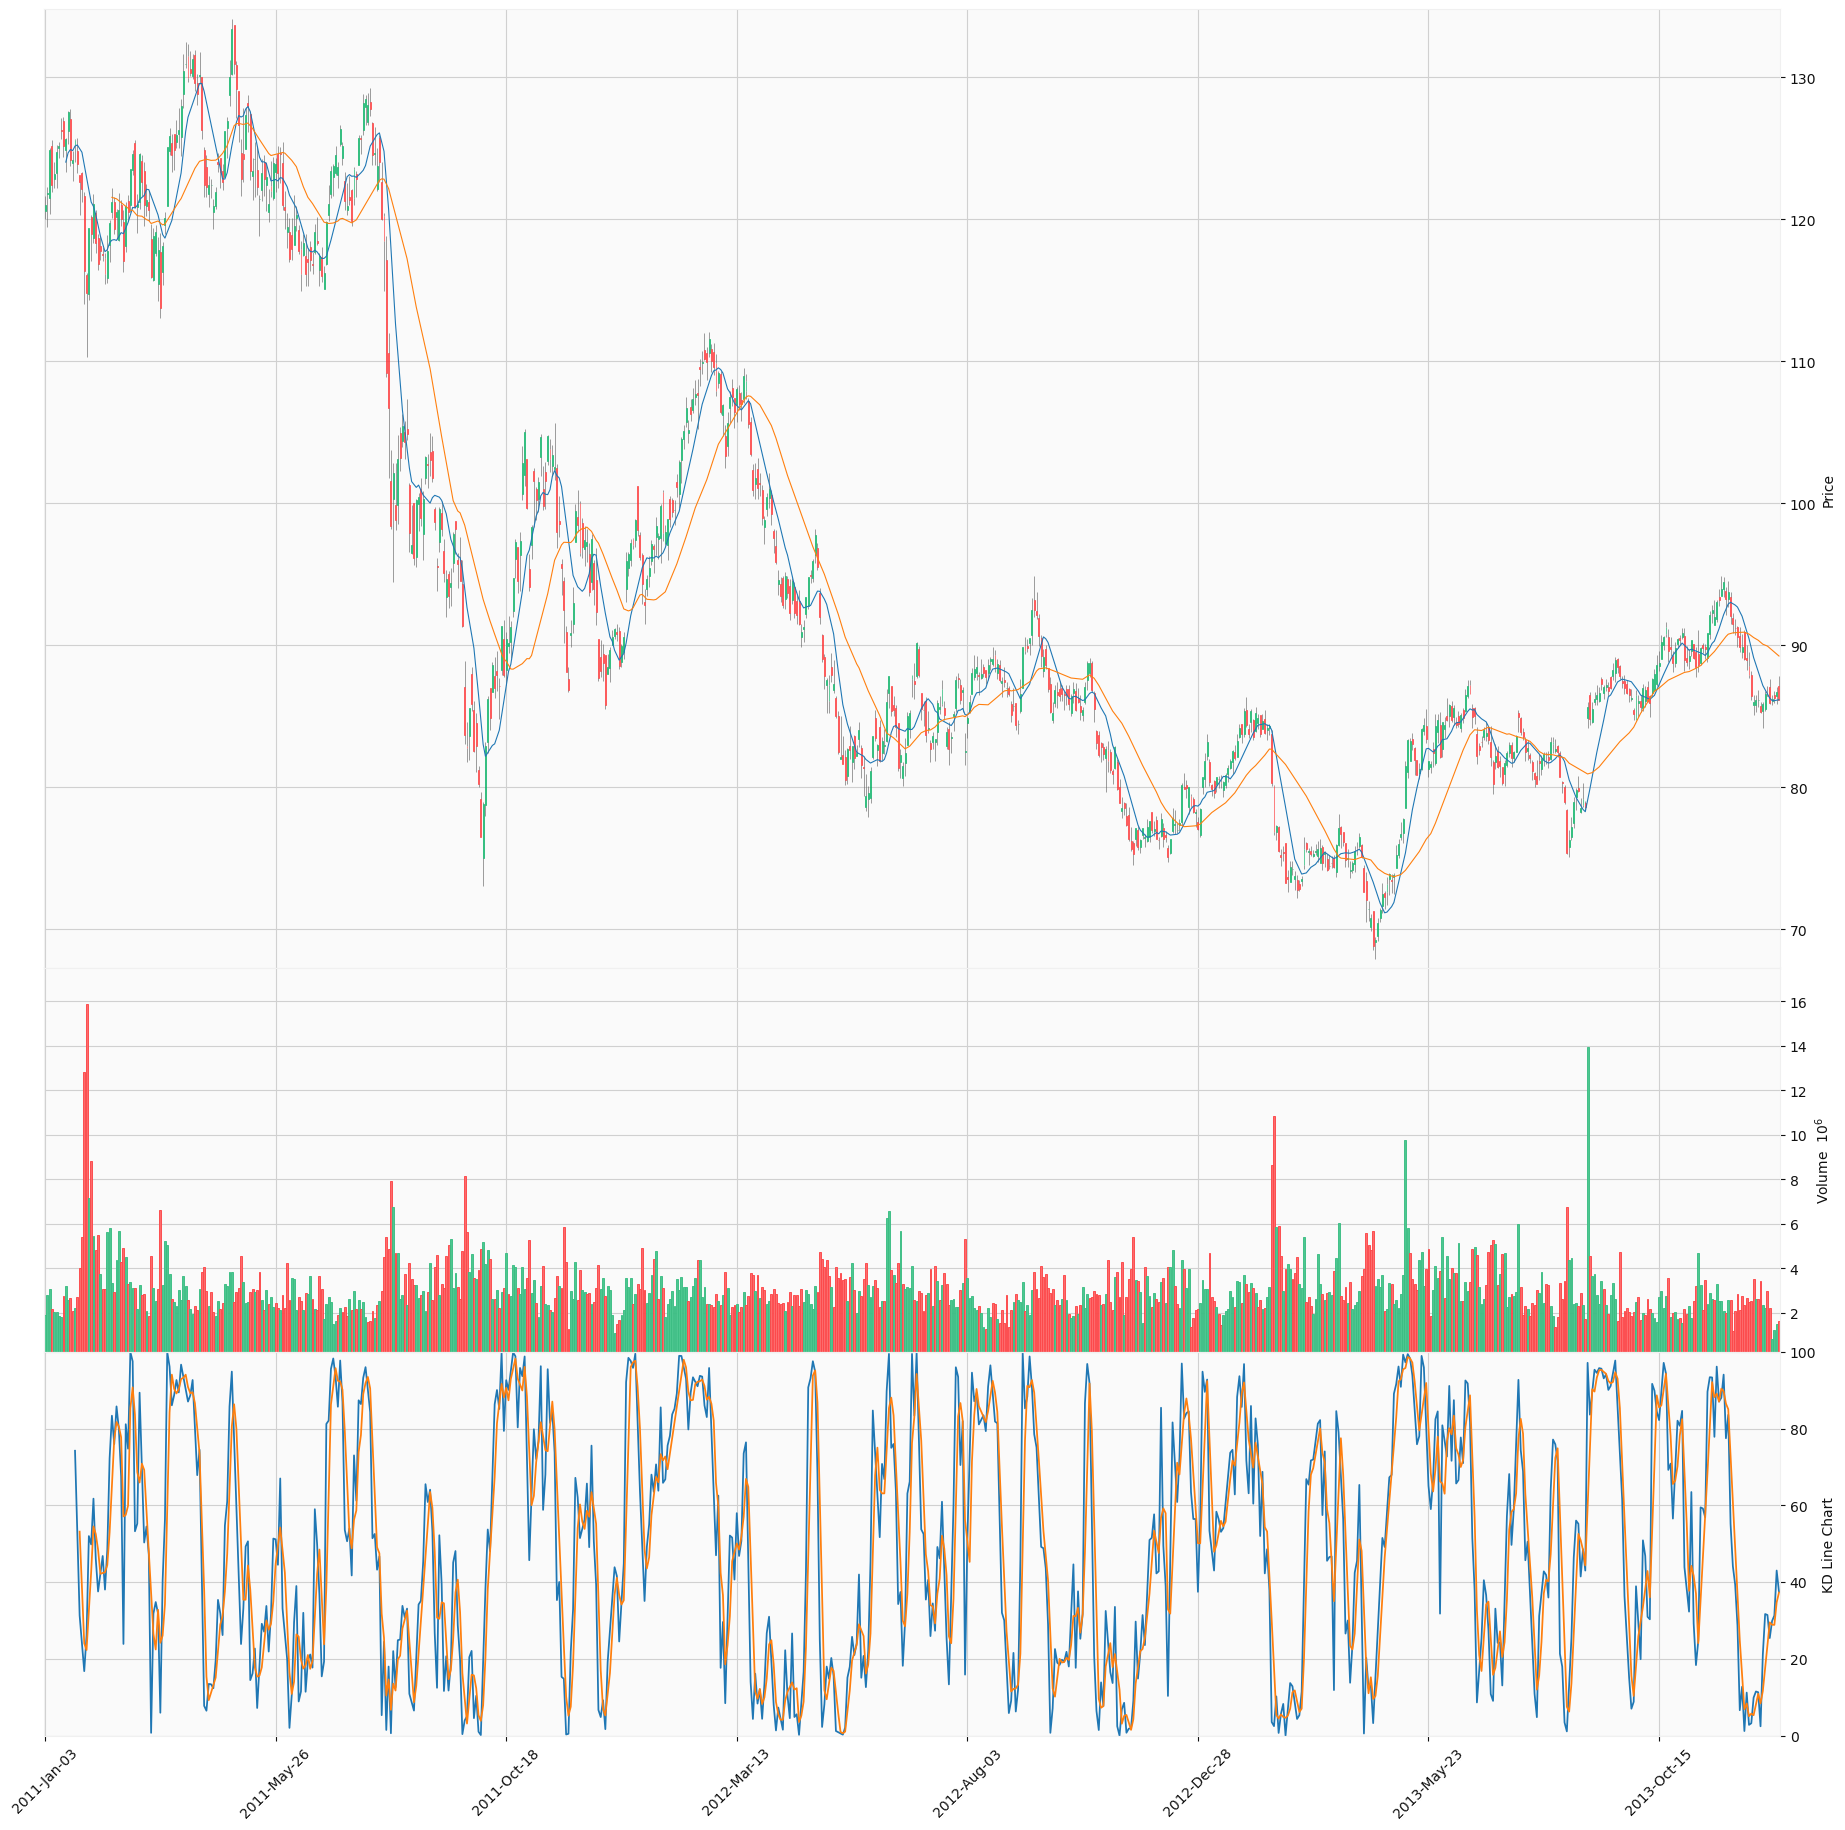

In [4]:
from matplotlib.pyplot import figure

# Stochastic
def Stochastic(df, window, smooth_window):
    stochastic = pd.DataFrame()
    stochastic['%K'] = ((df['Close'] - df['Low'].rolling(window).min()) \
                        / (df['High'].rolling(window).max() - df['Low'].rolling(window).min())) * 100
    stochastic['%D'] = stochastic['%K'].rolling(smooth_window).mean()
    # stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
    # stochastic['UL'] = 80
    # stochastic['DL'] = 20
    return stochastic

stochastic = Stochastic(df, 14, 3)

stochastic_plot  =  mpf.make_addplot((stochastic[['%K', '%D']]), ylim=[0, 100], panel=2, ylabel='KD Line Chart')


fig, ax = mpf.plot(
    df,returnfig=True, type='candle', mav=(10,30), figsize=(20,20), tight_layout=True, style='yahoo',volume=True, addplot=[stochastic_plot]
)
fig.savefig("images/candles_KD_volume.png")


In [5]:
# 10 Days MA, 30 Days MA, K, D
pd.set_option('display.max_rows', 10)


df["MA10"] = talib.SMA(df["Close"], 10)
df["MA30"] = talib.SMA(df["Close"], 30)
df["MA5"] = talib.SMA(df["Close"], 5)
df["K"], df["D"] = stochastic["%K"], stochastic["%D"]

df = df[~df["MA30"].isna()]
print(f" df rows: {len(df)}")


 df rows: 724


In [6]:
# min-max-normalize all numeric features:
NUMERIC_FEATURES = ["Open","High","Low","Close","MA10", "MA30", "K", "D" ]
for f in NUMERIC_FEATURES:
    min = np.min(df[f])
    max = np.max(df[f])
    df[f] = ( df[f] - min) / (max-min)
df

,Date,Open,High,Low,Close,Volume,Adj Close,CloseNext,MA10,MA30,MA5,K,D
DateTime,,,,,,,,,,,,,
2011-02-14,2011-02-14,0.796095,0.815553,0.831500,0.811096,3325900,100.99,119.34,0.811101,0.901377,118.462,0.833844,0.687568
2011-02-15,2011-02-15,0.806941,0.805659,0.813327,0.782582,2941900,99.46,120.51,0.811718,0.900315,118.830,0.759866,0.781214
2011-02-16,2011-02-16,0.790518,0.792362,0.807907,0.800713,4358900,100.43,120.62,0.810776,0.899467,119.702,0.858102,0.827207
2011-02-17,2011-02-17,0.765262,0.810297,0.806472,0.802417,5672600,100.52,120.01,0.814714,0.896773,120.276,0.799747,0.815615
2011-02-18,2011-02-18,0.804307,0.802412,0.823211,0.792965,4280000,100.01,117.07,0.820141,0.895285,120.332,0.675074,0.786788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-23,2013-12-23,0.277657,0.281076,0.286306,0.265303,2217600,73.15,86.21,0.258873,0.303613,86.022,0.254213,0.294675
2013-12-24,2013-12-24,0.263093,0.263296,0.285350,0.269177,822100,73.37,86.31,0.256014,0.301365,86.208,0.298551,0.288442
2013-12-26,2013-12-26,0.269290,0.267471,0.286785,0.270727,1232100,73.45,86.68,0.255826,0.299230,86.296,0.313043,0.288006


In [7]:
# add weekdays with one hot encoding
WEEKDAYS = ["W1", "W2", "W3", "W4", "W5", "W6", "W7"]
for i,e in enumerate(WEEKDAYS):
   df[e] = 0
   df[e] = (df.index.weekday == i).astype(int)

df


,Date,Open,High,Low,Close,Volume,Adj Close,CloseNext,MA10,MA30,MA5,K,D,W1,W2,W3,W4,W5,W6,W7
DateTime,,,,,,,,,,,,,,,,,,,,
2011-02-14,2011-02-14,0.796095,0.815553,0.831500,0.811096,3325900,100.99,119.34,0.811101,0.901377,118.462,0.833844,0.687568,1,0,0,0,0,0,0
2011-02-15,2011-02-15,0.806941,0.805659,0.813327,0.782582,2941900,99.46,120.51,0.811718,0.900315,118.830,0.759866,0.781214,0,1,0,0,0,0,0
2011-02-16,2011-02-16,0.790518,0.792362,0.807907,0.800713,4358900,100.43,120.62,0.810776,0.899467,119.702,0.858102,0.827207,0,0,1,0,0,0,0
2011-02-17,2011-02-17,0.765262,0.810297,0.806472,0.802417,5672600,100.52,120.01,0.814714,0.896773,120.276,0.799747,0.815615,0,0,0,1,0,0,0
2011-02-18,2011-02-18,0.804307,0.802412,0.823211,0.792965,4280000,100.01,117.07,0.820141,0.895285,120.332,0.675074,0.786788,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-23,2013-12-23,0.277657,0.281076,0.286306,0.265303,2217600,73.15,86.21,0.258873,0.303613,86.022,0.254213,0.294675,1,0,0,0,0,0,0
2013-12-24,2013-12-24,0.263093,0.263296,0.285350,0.269177,822100,73.37,86.31,0.256014,0.301365,86.208,0.298551,0.288442,0,1,0,0,0,0,0
2013-12-26,2013-12-26,0.269290,0.267471,0.286785,0.270727,1232100,73.45,86.68,0.255826,0.299230,86.296,0.313043,0.288006,0,0,0,1,0,0,0


In [8]:
# split the data based on date:
df_train = df[(df["Date"]>= "2011-01-01" )&  (df["Date"]<= "2012-12-31")]
df_validation = df[(df["Date"]>= "2013-01-01" )&  (df["Date"]<= "2013-06-30")] 
df_test = df[(df["Date"]>= "2013-07-01" )&  (df["Date"]<= "2013-12-30")]

print(f" df_train rows: {len(df_train)}")
print(f" df_validation rows: {len(df_validation)}")
print(f" df_test rows: {len(df_test)}")

 df_train rows: 473
 df_validation rows: 124
 df_test rows: 127


In [9]:
import torch.nn as nn
import torch

In [10]:
df[1:3]
# t = torch.tensor()
df[1:3][["Open", "Close"]].to_numpy()

array([[0.80694143, 0.78258174],
       [0.79051751, 0.80071285]])

In [103]:

PREDICTOR_VARIABLES = NUMERIC_FEATURES + WEEKDAYS 
PREDICTOR_COUNT = len(PREDICTOR_VARIABLES)


# gives a time_steps * 1 * feature count tensor
def get_training_period(df, start_index, time_steps):
    # print(f" get training period {start_index}-{start_index+time_steps-1}")
    np_repres= df[start_index:start_index+time_steps][PREDICTOR_VARIABLES].to_numpy().transpose().reshape((time_steps, 1, PREDICTOR_COUNT)).astype(float)
    target = df[start_index+time_steps-1:start_index+time_steps]["CloseNext"].to_numpy()[0]
    return torch.from_numpy(np_repres).float(), target

# each batch is of shape x*y*z = time_steps * batch_size * feature count
def get_batch(df, start_index, batch_size, time_steps):
    # print(f" get batch {start_index} with batch_size: {batch_size} and time_steps: {time_steps}")
    batch_tensor, target = get_training_period(df, start_index=start_index, time_steps=time_steps)
    targets = [target]
    for i in range(start_index+1, start_index+batch_size):
        # print(f"i: {i}")
        training_period_i, target = get_training_period(df, start_index=i, time_steps=time_steps)
        batch_tensor = torch.cat((batch_tensor, training_period_i), 1)
        targets.append(target)
    return batch_tensor, targets

def batches_iterator(df, batch_size, time_steps):
    dflen = len(df)
    for start_index in range(0, len(df)-time_steps,batch_size):
        # print(f"start index: {start_index}")
        actual_size = len(df[start_index:start_index+batch_size+time_steps])-time_steps
        # print(f"actual_size: {actual_size}")
        batch, targets = get_batch(df, start_index, actual_size, time_steps)
        yield batch, targets

# trying out the function


for (i,(batch,targets)) in enumerate(batches_iterator(df, 50, 30)):
    print(f"batch {i+1} as size:")
    print(batch.shape)

batch 1 as size:
torch.Size([30, 50, 15])
batch 2 as size:
torch.Size([30, 50, 15])
batch 3 as size:
torch.Size([30, 50, 15])
batch 4 as size:
torch.Size([30, 50, 15])
batch 5 as size:
torch.Size([30, 50, 15])
batch 6 as size:
torch.Size([30, 50, 15])
batch 7 as size:
torch.Size([30, 50, 15])
batch 8 as size:
torch.Size([30, 50, 15])
batch 9 as size:
torch.Size([30, 50, 15])
batch 10 as size:
torch.Size([30, 50, 15])
batch 11 as size:
torch.Size([30, 50, 15])
batch 12 as size:
torch.Size([30, 50, 15])
batch 13 as size:
torch.Size([30, 50, 15])
batch 14 as size:
torch.Size([30, 44, 15])


In [104]:
# some helper functions
def determine_device():
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    return DEVICE


class TrainSettings:
    EPOCHS = 4
    BATCH_SIZE = 64,
    TIME_STEPS = 30
    LR = 0.001
    LOSS_FUNCTION = torch.nn.MSELoss()
    DEVICE = determine_device()
    def __init__(self, EPOCHS=4, BATCH_SIZE=64, LR=0.001, LOSS_FUNCTION=torch.nn.MSELoss(), TIME_STEPS=30) -> None:
        self.DEVICE = determine_device()
        self.EPOCHS = EPOCHS
        self.BATCH_SIZE = BATCH_SIZE
        self.LR = LR
        self.LOSS_FUNCTION = LOSS_FUNCTION
        self.TIME_STEPS = TIME_STEPS

In [107]:
# creating RNN class:

class Regression_RNN(nn.Module):
    def __init__(self, size_input, size_hidden) -> None:
        super(Regression_RNN, self).__init__()
        self.size_hidden = size_hidden
        self.input_to_hidden = nn.Linear(size_input + size_hidden, size_hidden)
        self.input_to_output = nn.Linear(size_input + size_hidden, 1)

    def forward(self, input, hidden):
        combined = torch.cat((input,hidden), 1)
        print(type(combined))
        hidden = self.input_to_hidden(combined)
        output = self.input_to_output(combined)
        return output, hidden

    # batch is a time_steps x batch_size x features tensor

class Network:
    def __init__(self, model, train_settings = TrainSettings()):
        self.model = model
        self.train_settings = train_settings
        self.network = model.to(determine_device())
        self.optimizer = torch.optim.Adam(self.network.parameters(), lr=train_settings.LR)
        
    def _train_on_batch(self, batch, targets):
        # eg. 20 x 64 if 20 is batchsize and 64 is hidden_size
        self.network.zero_grad()
        hidden = torch.zeros(batch.shape[1], self.model.size_hidden).float()
        output = None
        for i in range(batch.shape[0]):
            # print(f"time dimension ({i}) with batch[i].shape: {batch[i].shape} and targets[i].shape: {targets[i].shape}")
            print(batch[i].shape)
            print(hidden.shape)
            output, hidden = self.network(batch[i], hidden)
            break
        # loss = torch.nn.MSELoss(output, target)
        # loss.backward()

    def train_one_epoch(self, df):
        for (i,(batch,targets)) in enumerate(batches_iterator(df, self.train_settings.BATCH_SIZE, self.train_settings.TIME_STEPS)):
            print("train on batch")
            self._train_on_batch(batch, targets)
            print(f"batch {i+1} as size:")
            print(batch.shape)



In [108]:
model = Regression_RNN(15, 64)
trainsettings = TrainSettings(BATCH_SIZE=20)
n = Network(model, trainsettings)
n.train_one_epoch(df)


train on batch
torch.Size([20, 15])
torch.Size([20, 64])
<class 'torch.Tensor'>


RuntimeError: expected scalar type Float but found Double